<a href="https://colab.research.google.com/github/laysabelici/analise_futebol_corinthians/blob/main/corinthians_x_atletico_-_mg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib
!pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 1.9 MB/s eta 0:00:00


In [ ]:
from mplsoccer import Pitch, VerticalPitch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df_statistics = pd.read_html('https://fbref.com/pt/partidas/d3926429/Corinthians-Atletico-Mineiro-2024Abril14-Serie-A', attrs={'id':'stats_bf4acd28_possession'})[0]
df_statistics.columns = ['_'.join(col).strip() for col in df_statistics.columns.values]
df_estatisticas = df_statistics.drop(16)

In [ ]:
df_estatisticas

,Unnamed: 0_level_0_Jogador,Unnamed: 1_level_0_#,Unnamed: 2_level_0_Nação,Unnamed: 3_level_0_Pos.,Unnamed: 4_level_0_Idade,Unnamed: 5_level_0_Min.,Contatos_Contatos,Contatos_Def Pen,Contatos_Terço Def,Contatos_Terço Central,...,Conduções_Conduções,Conduções_DistTot,Conduções_DistPrg,Conduções_PrgC,Conduções_1/3,Conduções_CPA,Conduções_Perda de Domínio,Conduções_Dis,Recepção_Rec,Recepção_PrgR
0,Yuri Alberto,9.0,br BRA,FW,23-027,90,26,1,1,8,...,16,69,4,1,1,1,8,0,18,4
1,Wesley Ribeiro,36.0,br BRA,LW,19-040,90,37,0,3,28,...,25,216,134,4,6,1,6,2,29,5
2,Ángel Romero,11.0,py PAR,RW,31-285,79,24,0,0,10,...,15,57,28,0,0,0,2,1,23,8
3,Pedro Raul,20.0,br BRA,RW,27-161,11,5,0,0,3,...,0,0,0,0,0,0,0,0,2,2
4,Rodrigo Garro,10.0,ar ARG,AM,26-101,75,53,0,1,37,...,21,140,39,1,0,0,2,2,32,1
5,Igor Coronado,77.0,br BRA,AM,31-240,15,15,0,0,9,...,9,57,37,2,2,0,1,0,13,1
6,Fausto Vera,5.0,ar ARG,DM,24-019,71,41,0,0,37,...,22,149,74,3,0,0,0,1,30,1
7,Maycon,7.0,br BRA,DM,26-274,19,22,0,5,13,...,7,108,90,3,1,0,0,0,12,1
8,Raniele,14.0,br BRA,"DM,CB",27-105,90,48,2,11,30,...,18,116,57,1,1,0,1,0,29,2
9,Hugo,46.0,br BRA,LB,26-229,90,54,2,16,31,...,9,82,29,1,0,0,1,0,23,2


In [ ]:
print(df_estatisticas.columns)

Index(['Unnamed: 0_level_0_Jogador', 'Unnamed: 1_level_0_#',
       'Unnamed: 2_level_0_Nação', 'Unnamed: 3_level_0_Pos.',
       'Unnamed: 4_level_0_Idade', 'Unnamed: 5_level_0_Min.',
       'Contatos_Contatos', 'Contatos_Def Pen', 'Contatos_Terço Def',
       'Contatos_Terço Central', 'Contatos_Terço de Ataque',
       'Contatos_Att Pen', 'Contatos_Em jogo', 'Dribles_Tent', 'Dribles_Suc',
       'Dribles_Suc%', 'Dribles_Tkld', 'Dribles_Tkld%', 'Conduções_Conduções',
       'Conduções_DistTot', 'Conduções_DistPrg', 'Conduções_PrgC',
       'Conduções_1/3', 'Conduções_CPA', 'Conduções_Perda de Domínio',
       'Conduções_Dis', 'Recepção_Rec', 'Recepção_PrgR'],
      dtype='object')


In [ ]:
posicionamento = {'posicao': ['Goleiro', 'Ataque', 'Meio-atacante-esquerda', 'Meio-atacante-direta', 'Meio-atacante-meia', 'Meio-defensor-direita',
                              'Meio-defensor-centro' ,'Meio-defensor-esquerda' ,
                              'Defesa-centro', 'Defesa-esquerda', 'Defesa-direta','Lateral-esquerdo', 'Lateral-direito'],
                  'y':[2, 90, 85, 85, 70, 44, 44, 44, 30, 24, 24, 55, 55],
                  'x':[40, 40, 15, 65, 40, 60, 40, 20, 40, 30, 50, 10, 70]}

jogadores = {'nome': ['Yuri Alberto', 'Wesley Ribeiro', 'Ángel Romero', 'Pedro Raul', 'Rodrigo Garro', 'Igor Coronado',
                      'Fausto Vera', 'Maycon', 'Raniele', 'Hugo', 'Gustavo Henrique', 'Paulinho', 'Félix Torres Caicedo', 'Fagner', 'Matheuzinho', 'Cássio'],
             'posicao':['Ataque', 'Meio-atacante-esquerda', 'Meio-atacante-direta', 'Meio-atacante-direta', 'Meio-atacante-meia', 'Meio-atacante-meia',
                        'Meio-defensor-direita','Meio-defensor-direita','Meio-defensor-esquerda', 'Defesa-direta','Defesa-centro', 'Meio-atacante-meia',
                        'Defesa-esquerda', 'Lateral-esquerdo', 'Lateral-direito', 'Goleiro']}

df_jogadores = pd.DataFrame(jogadores)
df_posicionamento = pd.DataFrame(posicionamento)

In [ ]:
df_jogadores = pd.merge(df_jogadores, df_posicionamento, on='posicao', how='outer')

In [ ]:
df_jogadores

,nome,posicao,y,x
0,Yuri Alberto,Ataque,90,40
1,Wesley Ribeiro,Meio-atacante-esquerda,85,15
2,Ángel Romero,Meio-atacante-direta,85,65
3,Pedro Raul,Meio-atacante-direta,85,65
4,Rodrigo Garro,Meio-atacante-meia,70,40
5,Igor Coronado,Meio-atacante-meia,70,40
6,Paulinho,Meio-atacante-meia,70,40
7,Fausto Vera,Meio-defensor-direita,44,60
8,Maycon,Meio-defensor-direita,44,60
9,Raniele,Meio-defensor-esquerda,44,20


In [ ]:
df_estatisticas['%Conducoes'] = ((df_estatisticas['Conduções_Conduções']/df_estatisticas['Conduções_Conduções'].sum())*100).round(2)
df_estatisticas['%DistTotal'] = ((df_estatisticas['Conduções_DistTot']/df_estatisticas['Conduções_DistTot'].sum())*100).round(2)
df_estatisticas['%DistAtaque'] = ((df_estatisticas['Conduções_DistPrg']/df_estatisticas['Conduções_DistPrg'].sum())*100).round(2)
df_estatisticas['%ProjAtaque9m'] = ((df_estatisticas['Conduções_PrgC']/df_estatisticas['Conduções_PrgC'].sum())*100).round(2)
df_estatisticas['%PerdaDomínio'] = ((df_estatisticas['Conduções_Perda de Domínio']/df_estatisticas['Conduções_Perda de Domínio'].sum())*100).round(2)
df_estatisticas['%Desarmes'] = ((df_estatisticas['Conduções_Dis']/df_estatisticas['Conduções_Dis'].sum())*100).round(2)
df_estatisticas['%minutos'] = ((df_estatisticas['Unnamed: 5_level_0_Min.']/90)*100).round(2)
df_estatisticas = (pd.merge(df_jogadores, df_estatisticas, left_on='nome', right_on='Unnamed: 0_level_0_Jogador'))

In [ ]:
df_estatisticas['inicio_ataque_x'] = (df_estatisticas['x'])
df_estatisticas['inicio_ataque_y'] = (df_estatisticas['y'])
df_estatisticas['fim_ataque_y'] = (df_estatisticas['y']+((df_estatisticas['%DistAtaque'])*120)/100)
df_estatisticas['fim_ataque_x'] = (40)

In [ ]:
colunas_conducao = df_estatisticas.loc[:,['Unnamed: 0_level_0_Jogador','%minutos','%Conducoes','%DistTotal','%DistAtaque','%ProjAtaque9m','%PerdaDomínio','%Desarmes',
                                          'x','y','inicio_ataque_x','inicio_ataque_y','fim_ataque_x','fim_ataque_y']].round(2)
colunas_conducao

,Unnamed: 0_level_0_Jogador,%minutos,%Conducoes,%DistTotal,%DistAtaque,%ProjAtaque9m,%PerdaDomínio,%Desarmes,x,y,inicio_ataque_x,inicio_ataque_y,fim_ataque_x,fim_ataque_y
0,Yuri Alberto,100.00,8.29,5.48,0.59,5.56,36.36,0.00,40,90,40,90,40,90.71
1,Wesley Ribeiro,100.00,12.95,17.17,19.79,22.22,27.27,33.33,15,85,15,85,40,108.75
2,Ángel Romero,87.78,7.77,4.53,4.14,0.00,9.09,16.67,65,85,65,85,40,89.97
3,Pedro Raul,12.22,0.00,0.00,0.00,0.00,0.00,0.00,65,85,65,85,40,85.00
4,Rodrigo Garro,83.33,10.88,11.13,5.76,5.56,9.09,33.33,40,70,40,70,40,76.91
5,Igor Coronado,16.67,4.66,4.53,5.47,11.11,4.55,0.00,40,70,40,70,40,76.56
6,Paulinho,21.11,1.04,0.40,0.44,0.00,0.00,0.00,40,70,40,70,40,70.53
7,Fausto Vera,78.89,11.40,11.84,10.93,16.67,0.00,16.67,60,44,60,44,40,57.12
8,Maycon,21.11,3.63,8.59,13.29,16.67,0.00,0.00,60,44,60,44,40,59.95
9,Raniele,100.00,9.33,9.22,8.42,5.56,4.55,0.00,20,44,20,44,40,54.10


In [ ]:
df_titulares = colunas_conducao.loc[colunas_conducao['Unnamed: 0_level_0_Jogador'].isin(['Cássio','Fagner','Félix Torres Caicedo','Hugo','Gustavo Henrique',
                                                                                         'Fausto Vera','Raniele','Rodrigo Garro','Ángel Romero','Yuri Alberto','Wesley Ribeiro'])]
df_titulares

,Unnamed: 0_level_0_Jogador,%minutos,%Conducoes,%DistTotal,%DistAtaque,%ProjAtaque9m,%PerdaDomínio,%Desarmes,x,y,inicio_ataque_x,inicio_ataque_y,fim_ataque_x,fim_ataque_y
0,Yuri Alberto,100.00,8.29,5.48,0.59,5.56,36.36,0.00,40,90,40,90,40,90.71
1,Wesley Ribeiro,100.00,12.95,17.17,19.79,22.22,27.27,33.33,15,85,15,85,40,108.75
2,Ángel Romero,87.78,7.77,4.53,4.14,0.00,9.09,16.67,65,85,65,85,40,89.97
4,Rodrigo Garro,83.33,10.88,11.13,5.76,5.56,9.09,33.33,40,70,40,70,40,76.91
7,Fausto Vera,78.89,11.40,11.84,10.93,16.67,0.00,16.67,60,44,60,44,40,57.12
9,Raniele,100.00,9.33,9.22,8.42,5.56,4.55,0.00,20,44,20,44,40,54.10
10,Hugo,100.00,4.66,6.52,4.28,5.56,4.55,0.00,50,24,50,24,40,29.14
11,Gustavo Henrique,78.89,4.66,2.15,2.81,0.00,4.55,0.00,40,30,40,30,40,33.37
12,Félix Torres Caicedo,100.00,7.25,5.72,7.53,5.56,0.00,0.00,30,24,30,24,40,33.04
13,Fagner,50.00,3.63,3.34,5.32,5.56,0.00,0.00,10,55,10,55,40,61.38


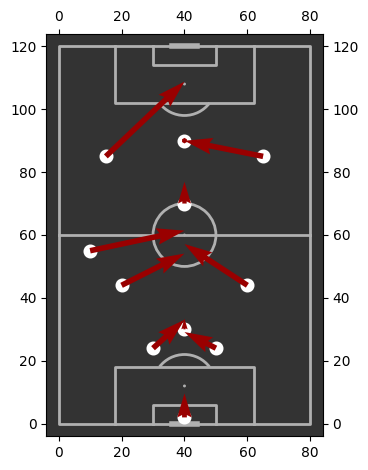

In [ ]:
pitch = VerticalPitch(positional=False, pitch_color='#333333', axis=True, label=True, tick=True)
fig, ax = pitch.draw()


x = df_titulares['x']
y = df_titulares['y']


ax.scatter(x, y, c='white', linewidth=3, s=50)


pitch.arrows(df_titulares['y'], df_titulares['x'], df_titulares['fim_ataque_y'], df_titulares['fim_ataque_x'],
             ax=ax, zorder=1, color='#990000')


plt.show()